# Cryo-EM Ribosome Nearest Distance Neighbour Project

## 1. Introduction

## 2. Data used for this analysis

### Preprocessing the data

### Data Structure

Here we first define a function read_csfile(), which reads the input dataset and output the header and content.

In [ ]:
def read_csfile(csfile):
    content = np.array(np.load(csfile).tolist())
    dtype   = np.load(csfile).dtype
    header = []
    for key in dtype.fields.keys():
        header.append(key)
    header = np.array(header)
    return header, content

In [65]:
particle_file = '/Users/Expo/Desktop/Cryo-EM/Project/cryoem-analysis-tools/data/P8_J60_passthrough_particles.cs'
header, content = read_csfile(particle_file)

The shape of the content array is (244798, 28), which means there are 244,798 data points represented as arrays in the content array, and each data point (array) has 28 elements. 

In [68]:
print(content.shape)

(244798, 28)


The header contains the information of how the data is organized in the content array. For example, we see the first element of every data point is the unique id, which is used to identify a specific group of micrographs. The information most relevant to us is the 'location/center_x_frac' and 'location/center_y_frac' element.

In [66]:
print(header)

['uid' 'location/micrograph_uid' 'location/exp_group_id'
 'location/micrograph_path' 'location/micrograph_shape'
 'location/center_x_frac' 'location/center_y_frac' 'pick_stats/ncc_score'
 'pick_stats/power' 'pick_stats/template_idx' 'pick_stats/angle_rad'
 'ctf/type' 'ctf/exp_group_id' 'ctf/accel_kv' 'ctf/cs_mm'
 'ctf/amp_contrast' 'ctf/df1_A' 'ctf/df2_A' 'ctf/df_angle_rad'
 'ctf/phase_shift_rad' 'ctf/scale' 'ctf/scale_const' 'ctf/shift_A'
 'ctf/tilt_A' 'ctf/trefoil_A' 'ctf/tetra_A' 'ctf/anisomag' 'ctf/bfactor']


## 3. Implementation

In [23]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

In [41]:
def read_csfile(csfile):
    content = np.array(np.load(csfile).tolist())
    dtype   = np.load(csfile).dtype
    header = []
    for key in dtype.fields.keys():
        header.append(key)
    header = np.array(header)
    return header, content

In [42]:
particle_file = '/Users/Expo/Desktop/Cryo-EM/Project/cryoem-analysis-tools/data/P8_J60_passthrough_particles.cs'

In [43]:
header, content = read_csfile(particle_file)

In [44]:
header

array(['uid', 'location/micrograph_uid', 'location/exp_group_id',
       'location/micrograph_path', 'location/micrograph_shape',
       'location/center_x_frac', 'location/center_y_frac',
       'pick_stats/ncc_score', 'pick_stats/power',
       'pick_stats/template_idx', 'pick_stats/angle_rad', 'ctf/type',
       'ctf/exp_group_id', 'ctf/accel_kv', 'ctf/cs_mm',
       'ctf/amp_contrast', 'ctf/df1_A', 'ctf/df2_A', 'ctf/df_angle_rad',
       'ctf/phase_shift_rad', 'ctf/scale', 'ctf/scale_const',
       'ctf/shift_A', 'ctf/tilt_A', 'ctf/trefoil_A', 'ctf/tetra_A',
       'ctf/anisomag', 'ctf/bfactor'], dtype='<U25')

In [45]:
content.shape

(244798, 28)

In [46]:
content[:10,1]

array([12048556009868800315, 12048556009868800315, 12048556009868800315,
       12048556009868800315, 12048556009868800315, 12048556009868800315,
       12048556009868800315, 12048556009868800315, 12048556009868800315,
       12048556009868800315], dtype=object)

In [47]:
mic1 = np.where(content[:,1]==content[0,1])

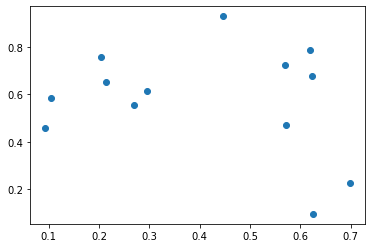

In [48]:
plt.scatter(content[mic1,5],content[mic1,6])
plt.show()

In [49]:
# Using sklearn.metrics.pairwise.euclidean_distances function
def findMinDistance(mic, min_distance):
    loc = list(zip(content[mic,5][0], content[mic,6][0]))
    distances = euclidean_distances(loc, loc)

    for x in distances:
        minval = np.min(x[np.nonzero(x)])
        min_distances.append(minval)

In [59]:
# Array of distance to the nearest neighbor
min_distances=[]

# Find the unique ID of the pictures
uniqID = np.unique(content[:,1])

for i in uniqID:
    mic = np.where(content[:,1]==i)
    if(mic[0].shape[0]>1):
        findMinDistance(mic, min_distances)

244667


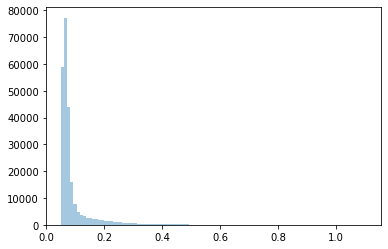

In [61]:
sns.distplot(min_distances, hist=True, kde = False, bins = 100);
print(len(min_distances))